# Machine Learning Summative Assessment

This course is assessed through a final project. The overall aim of this project is to examine the students understanding of modern machine learning techniques at the basic theoretical, intuitive as well as practical levels. With regard to practical applications we use Python, as well related libraries such as Numpy, Scikit and TensorFlow.

The project is centred around the MNIST data set of handwritten digits. It consists of grayscale images of hand written digits, as well as the true labels/digits of each image. The data is split in train and test sets. Many problems relate to the classification task of predicting the true labels given the images. Instructions with details on the project will be provided during the course. Here we only outline the various stages of the project:

# Unsupervised learning. [15 points] 

Perform a principle component analysis on the MNIST data set. Produce various plots in the dimensionally reduced space using the principle components.

In [1]:
from sklearn import datasets, pipeline, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import (RBFSampler, Nystroem)
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [3]:
mnist = datasets.fetch_mldata('MNIST original', data_home = 'datasets/')

In [14]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [4]:
#defining X and y. Easier for an economist to understand
X = mnist.data
y = mnist.target

In [6]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


**Scaling and train/test/split**

In [7]:
## for scaling
#X = X / 255.0
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Graphing by the elbow method**

In [8]:
# 100% variance explained
pca = PCA()

In [9]:
# Let's PCA the full dataset for the graph
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# Summing explained variance
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)

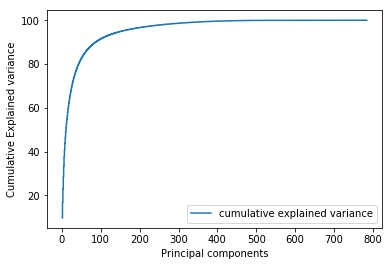

In [11]:
# plotting
%matplotlib inline
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='lower right')
plt.show()

**Using PCA to project back an image based on reduced components**

In [12]:
def lowdimension(perc):
    pca = PCA(perc)
    temp = pca.fit_transform(X) #lower dimension
    print(perc, 'variance explained', 'is', pca.n_components_, 'out of 784 components')
    new = pca.inverse_transform(temp)
    return new

0.2 variance explained is 3 out of 784 components


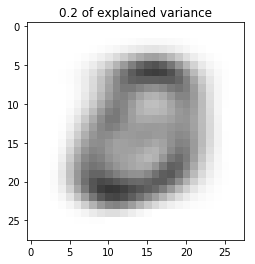

0.5 variance explained is 11 out of 784 components


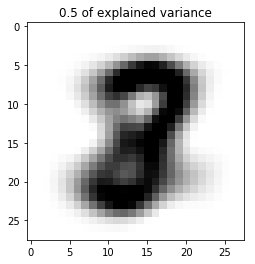

0.9 variance explained is 87 out of 784 components


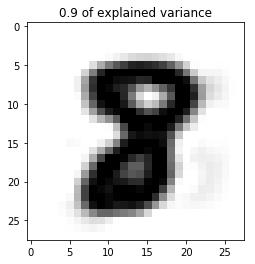

0.99 variance explained is 331 out of 784 components


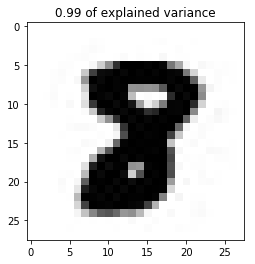

Text(0.5,1,'Original Image: 784 components')

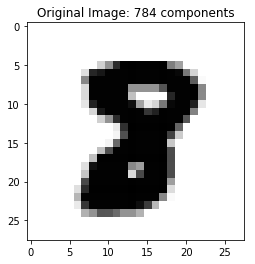

In [14]:
#picking a random digit from this 70k data
%matplotlib inline

dim = [0.2,0.5,0.9,.99]

for i in dim:
    plt.imshow(lowdimension(i)[50453].reshape(28,28),
                  cmap = plt.cm.binary, interpolation='nearest',
                  clim=(0, 255))
    a = str(i) + " of explained variance"
    plt.title(a)
    plt.show()

plt.imshow(X[50453].reshape(28,28),
              cmap = plt.cm.binary, interpolation='nearest',
              clim=(0, 255))
plt.title('Original Image: 784 components')

# Support vector machines. [30 points]

a) Theory. [15 points] Explain either the mathematics or the intuition behind the kernel trick used in SVMs and how it allows to express a non-linear classifier through a linear classifier in a higher-dimensional space.

<img src= "dots.png">

<img src= "equation.png">

<img src= "equation2.png" width="400" height="200">

<img src= "3d.png" width="400" height="200">

In [1]:
#Code used to generate above
# from matplotlib import pyplot
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# from pylab import *

# %pylab

# fig = pyplot.figure()
# ax = Axes3D(fig)


# x_blue = [4,4,5,5.5,6,6]
# y_blue = [4,6,4.5,5.5,4,5]
# z_blue = [16,24,22.5,30.25,24,30]
# x_orange = [0,0,0,0.5,1,1,1.5,2,2,5,6,6]
# y_orange = [1,3,5.5,4,2,3.5,6,3,4.5,1,0,1]
# z_orange = [0,0,0,2,2,3.5,9,6,9,5,0,6]

# # x_div = np.array([2,2,2.1,2.3,2.9,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.1,6.9])
# # #x_div = np.arange(0.0, 7, 0.2)
# # #y_div = np.array(13.1/x_div)
# # y_div = np.array([7,6.5,5.9,5.2,4.5,5.0,3.5,3.0,3.8,2.5,2.1,2.0,2.0,2.0])

# # def f(x, y):
# #     return x*y

# # X, Y = np.meshgrid(x_div, y_div)
# # Z = f(X, Y)


# # ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, color="gray", alpha = 0.4)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z = x*y')
# ax.set_ylim(0, 10)
# ax.set_zlim(0, 30)

# ax.scatter(x_blue, y_blue, z_blue, color="blue")
# ax.scatter(x_orange, y_orange, z_orange, color="orange")

# pyplot.show()

b) Practical. [15 points] Build a linear support vector classifier in Python for the MNIST classification task. Use various kernels to build a better non-linear classifier.

**Scaling and Train, test split**

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# we keep 30% random examples for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# we scale the data in the range [-1,1]
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


**Trying out smaller subsets (because grid search takes days) to see if the code works**

In [18]:
# from sklearn.datasets import load_digits
# digits = load_digits()
# X,y = digits.data, digits.target
# print(X.shape, y.shape)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

(1797, 64) (1797,)


In [6]:
#using only first 10k to speed up this very slow process.
X_train = X_train[:10000,:]
X_test = X_test[:10000,:]
y_train = y_train[:10000]
y_test  = y_test[:10000]

**Grid search for optimal model**

In [9]:
svm = SVC()
cv_performance = cross_val_score(svm, X_train, y_train,cv=10)
test_performance = svm.fit(X_train, y_train).score(X_test,y_test)
print ('Cross-validation accuracy score: %0.3f,'' test accuracy score: %0.3f'% (np.mean(cv_performance),test_performance))

Cross-validation accuracy score: 0.939, test accuracy score: 0.948


In [10]:
learning_algo = SVC(kernel='linear', random_state=101)
search_space = [{'kernel': ['rbf'],'C':np.logspace(-3, 3, 7),'gamma': np.logspace(-3, 2, 6)}]
                #[{'kernel': ['linear'],'C': np.logspace(-3, 3, 7)},
               #{'kernel': ['rbf'],'C':np.logspace(-3, 3, 7),'gamma': np.logspace(-3, 2, 6)},
              #  {'kernel': ['poly'],'C':np.logspace(-3, 3, 7),'degree': np.int_([1,2,3,4,5]), 'gamma': np.logspace(-3, 2, 6)},
              #  {'kernel': ['sigmoid'], 'C':np.logspace(-3, 3, 7)}]

gridsearch = GridSearchCV(learning_algo, param_grid=search_space,refit=True, cv=10, n_jobs=17)
gridsearch.fit(X_train,y_train)

print ('Best parameter: %s'% str(gridsearch.best_params_))

cv_performance = gridsearch.best_score_
test_performance = gridsearch.score(X_test, y_test)

print ('Cross-validation accuracy score: %0.3f,' ' test accuracy score: %0.3f' % (cv_performance,test_performance))

Best parameter: {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
Cross-validation accuracy score: 0.966, test accuracy score: 0.973


**Trying different kernels using the best parameters on GridSearch**
* Linear: 'C': 0.1
* RBF/Gaussian: 'C':10.0, 'gamma':0.01 = 0.966; 0.973
* Polynomial degree: 'C': 0.001, 'degree': 5, 'gamma': 0.1
* Sigmoid Kernel:'C': 10.0

## Linear

In [17]:
clf = SVC(kernel='linear', C = 0.1)

In [18]:
clf.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
expected = y_train
predicted = clf.predict(X_train) #yhat

In [20]:
print('accuracy score', clf.score(X_test, y_test)) #testing if the model generated from train works at the test set

accuracy score 0.9242


In [21]:
print("Classification report for classifier %s:\n%s\n"
  % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       977
         1.0       0.99      1.00      0.99      1148
         2.0       0.99      0.99      0.99       983
         3.0       0.98      0.99      0.98      1057
         4.0       0.98      0.99      0.98       935
         5.0       0.99      0.98      0.99       961
         6.0       1.00      1.00      1.00       933
         7.0       0.99      0.98      0.99      1023
         8.0       0.99      0.98      0.98      1000
         9.0       0.98      0.97      0.98       983

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       

## Polynomial degree 5

In [22]:
clf = SVC(kernel='poly', degree=5, C=0.001, gamma = 0.1)

In [23]:
clf.fit(X_train,y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
expected = y_train
predicted = clf.predict(X_train) #yhat

In [25]:
print(clf.score(X_test, y_test)) 

0.9714


In [26]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       977
         1.0       1.00      1.00      1.00      1148
         2.0       1.00      1.00      1.00       983
         3.0       1.00      1.00      1.00      1057
         4.0       1.00      1.00      1.00       935
         5.0       1.00      1.00      1.00       961
         6.0       1.00      1.00      1.00       933
         7.0       1.00      1.00      1.00      1023
         8.0       1.00      1.00      1.00      1000
         9.0       1.00      1.00      1.00       983

   micro avg       1.00      1.00      1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00

## Gaussian kernel

In [11]:
clf = SVC(kernel="rbf", C = 10.0, gamma = 0.01)

In [12]:
clf.fit(X_train,y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
expected = y_train
predicted = clf.predict(X_train) #yhat

In [41]:
print('accuracy score', clf.score(X_test, y_test)) #testing if the model generated from train works at the test set

accuracy score 0.2038


In [42]:
print("Classification report for classifier %s:\n%s\n"
  % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       977
         1.0       1.00      1.00      1.00      1148
         2.0       1.00      1.00      1.00       983
         3.0       1.00      1.00      1.00      1057
         4.0       1.00      1.00      1.00       935
         5.0       1.00      1.00      1.00       961
         6.0       1.00      1.00      1.00       933
         7.0       1.00      1.00      1.00      1023
         8.0       1.00      1.00      1.00      1000
         9.0       1.00      1.00      1.00       983

   micro avg       1.00      1.00      1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00   

## Sigmoid

In [32]:
clf = SVC(kernel="sigmoid", C = 10.0)

In [33]:
clf.fit(X_train,y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [34]:
expected = y_train
predicted = clf.predict(X_train) #yhat

In [35]:
print('accuracy score', clf.score(X_test, y_test)) #testing if the model generated from train works at the test set

accuracy score 0.8837


In [36]:
print("Classification report for classifier %s:\n%s\n"
  % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       977
         1.0       0.92      0.98      0.95      1148
         2.0       0.89      0.86      0.88       983
         3.0       0.86      0.86      0.86      1057
         4.0       0.90      0.92      0.91       935
         5.0       0.84      0.83      0.83       961
         6.0       0.94      0.95      0.94       933
         7.0       0.93      0.91      0.92      1023
         8.0       0.88      0.84      0.86      1000
         9.0       0.88      0.85      0.87       983

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg     

# Neural Networks. [50 points]

a) Theory. [15 points] By applying the chain law of derivatives to the objective function of a neural network, derive the back propagation algorithm.

$$ L(y,\hat{y})= -\sum_{i=0}^{j}y_ilog(\hat{y_i}) $$

where: <br>
$j$ is the number of classes (i.e, for MNIST = 10) <br>
$y$ is the actual output <br>
$\hat{y}$ is the predicted output

Consider a single-output case like below.  Recall that our objective is to minimize the cost C.  

The arrows suggest that there are three main steps needed to arrive at C, which involve:
* a vector of weights $w_n$
* an non-linear activation function $\sigma (z)$, where $z = w_0x_0 +... +w_nx_n + b$ 
* the cost, which compares the predicted output $\sigma (z) = \hat{y}$ and the actual $y$

<img src= "onelayerplus.png" width="400">

But from the diagram above, we see that small changes in $w_n$ can lead to a chain reaction, as it affects the output in $z$, and subsequently the output in $\hat{y}$. 

Hence, if we would like to know C changes with respect to each $w_n$, we must look at all the paths that lead to C, and sum all the effects to that path.  This can be done via the **chain rule** of derivatives:


$$\frac{\partial C}{\partial w_n} = \sum_{i=1}^{n}\frac{\partial C}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial w_n}$$


Using the definitions earlier, we can dissect each of the three components of the chain rule:

$$\frac{\partial C}{\partial \hat{y}} = \frac{\partial L(y,\hat{y})}{\partial \hat{y}} = - y \frac{\partial L}{\partial \hat{y}} log(\hat{y}) = \frac{-y}{\hat y}$$

$$\frac{\partial \hat{y}}{\partial z} = \frac{\partial \sigma (z)}{\partial z}  = \sigma (z) (1-\sigma (z)) = \hat{y} (1-\hat{y})$$

$$\frac{\partial z}{\partial w_n} = \frac{\partial w_0x_0 +... +w_nx_n + b}{\partial w_n} = w_n$$

Combining all three, we have:

$$\frac{-y}{\hat y} * \hat{y} (1-\hat{y}) * w_n  = (\hat{y}-y)w_n$$

Vectorizing the above to include m samples:

$$\frac{\partial C}{\partial w_n} = \frac{1}{m}(\hat{y}-y)^TX_n$$


**Feed forward, left to right:**  We first initialize by giving arbitrary values to $w_i$, then we pass them on to an activation function $\sigma (z)$, which then computes for a predicted value for $\hat{y}$, which is then imputed to the log-loss function $L(y,\hat{y})$ in order to compute for the cost.

**Back propagate, right to left:** Once we have measured the value of the cost/error, we distribute (or 'propagate') this error back into the network and adjust the arbitrary weights.  Then we "train the model" by iteraterating repeatedly through steps 1 and 2 again, going forward and backward and continually adjusting the gradients until we descend to the minimum value of C.

<hr />
b) Coding. [20 points] Implement from scratch, as a Python class, a feedforward neural network with 1 hidden layer of 100 hidden units merely using basic linear algebra computations in Numpy. Based on your derivation of back-propagation, or otherwise, implement a train method based on stochastic or batch gradient descent. Test your implementation on the MNIST classification task.

In [125]:
class NeuralNet():
    def __init__(self):
        random.seed(41)
        
        digits = 10
        X = mnist.data
        y = mnist.target
        
        X = X / 255  #to standardize
        
        examples = y.shape[0]

        y = y.reshape(1, examples)  #transform from [,70000] to [1,70000]

        Y_new = np.eye(digits)[y.astype('int32')] #diagonal matrix [10x10][1x70000]= [70,000x10]
        Y_new = Y_new.T.reshape(digits, examples) #[10x70,000]
        
        #need to use the Y_new matrix 
        m = 50000
        m_test = X.shape[0] - m

        X_train, X_test = X[:m].T, X[m:].T
        Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

        shuffle_index = np.random.permutation(m)
        X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]
        
    #L(y,ŷ) = −∑ yi * log(yi^)
    def compute_multiclass_loss(Y, Y_hat):
        L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
        m = Y.shape[1]
        L = -(1/m) * L_sum
        return L

    #define a nonlinear function for z (using sigmoid)
    def sigmoid(z):
        s = 1 / (1 + np.exp(-z))
        return s 

    
    if __name__ == "__main__":
        n_x = X_train.shape[0]
        n_h = 100
        learning_rate = 1 #alpha

        W1 = np.random.randn(n_h, n_x) #initial layer weights. 100x784
        b1 = np.zeros((n_h, 1)) #assume bias is zero (100x1)
        W2 = np.random.randn(digits, n_h)  #hidden layer weights. 10x100
        b2 = np.zeros((digits, 1)) #assume bias is zero (10x1)

        X = X_train
        Y = Y_train

        for i in range(1000):

            Z1 = np.matmul(W1,X) + b1 #z=w0x0+...+wnxn+b = 100x60,000
            A1 = sigmoid(Z1) #define non-linear fxn as sigmoid = 100x60000
            Z2 = np.matmul(W2,A1) + b2 #z=w0x0+...+wnxn+b = 10x60000
            A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0) #= 10x60000

            cost = compute_multiclass_loss(Y, A2)

            dZ2 = A2-Y # y minus y hat
            dW2 = (1./m) * np.matmul(dZ2, A1.T) #average cost multiplied by sigmoid
            db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

            dA1 = np.matmul(W2.T, dZ2) #∂L(y,ŷ)/∂y
            dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1)) #∂L(y,ŷ)/∂y * σ(z)(1−σ(z)
            dW1 = (1./m) * np.matmul(dZ1, X.T) #∂L(y,ŷ)/∂y * σ(z)(1−σ(z) * Xi (vectorized/averaged)
            db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

            W2 = W2 - learning_rate * dW2
            b2 = b2 - learning_rate * db2 #zero
            W1 = W1 - learning_rate * dW1
            b1 = b1 - learning_rate * db1 #zero

            if (i % 50 == 0):
                print("Epoch", i, "cost: ", cost)

        print("Final cost:", cost)

Epoch 0 cost:  11.153300871727827
Epoch 100 cost:  0.714391523465018
Epoch 200 cost:  0.5388176577925046
Epoch 300 cost:  0.4601152520673233
Epoch 400 cost:  0.41230586518541945
Epoch 500 cost:  0.37899525133364265
Epoch 600 cost:  0.35386006253739316
Epoch 700 cost:  0.3338703711798501
Epoch 800 cost:  0.3173772634820708
Epoch 900 cost:  0.30339102050980293
Epoch 1000 cost:  0.2912730496944363
Epoch 1100 cost:  0.2805907449320115
Epoch 1200 cost:  0.27104045488252876
Epoch 1300 cost:  0.2624050958380685
Epoch 1400 cost:  0.25452772654042805
Epoch 1500 cost:  0.24729254005501597
Epoch 1600 cost:  0.24061044805486276
Epoch 1700 cost:  0.23440930046863157


KeyboardInterrupt: 

In [1]:
#check against test set
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(metrics.confusion_matrix(predictions, labels))
print(metrics.classification_report(predictions, labels))

NameError: name 'np' is not defined

<hr />
c) Practical. [15 points] Use TensorFlow (potentially using a frontend such as tflearn or keras) to implement a 2 layer neural network with 1200 and 1200 hidden units. Use RELU activation function instead of sigmoids, as well as add regularisation methods such as dropout to produce a model which has a test error of below 2%. 10 points will be given for building a working network and 5 point for achieving the benchmark. 

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python import keras
import numpy as np
import math
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten, Dropout

In [ ]:
X = mnist.data
y = mnist.target

In [ ]:
X = X.reshape((70000,28,28,1))

In [ ]:
X = X/255

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#just checkin
plt.imshow(X[250,:,:,0]

# Data Science Challenge. [5 points] 

This is a problem to challenge you. Any reasonable attempt will grant you full points. For this problem (and only for this problem) you are allowed to work in groups of up to 3 students handing in the same solution. The idea is that you use this last problem as a competition between your peers or peer groups in the course. It is a continuation of problem 3.c. Using a high-level frontend for tensorflow such as tflearn or keras, try to improve your classifier by means of deeper networks and/or convolution layers which are readily available as plug&play building blocks. Depending on interest and time we can use the more challenging CIFAR10 data set for this last part as opposed to the simpler to predict MNIST dataset. In the latter case, it would also make sense to use GPUs.

In [ ]:
X = mnist.data
y = mnist.target

In [ ]:
X = X.reshape((70000,28,28,1))

In [ ]:
X = X/255

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, kernel_initializer='he_normal', activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [ ]:
train_model = model.fit(X_train, y_train,
                  batch_size=128,
                  epochs=10,
                  verbose=1,
                  validation_data=(X_test, y_test))

In [ ]:
model.summary()

# References

PCA <br>
https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Support Vector Machines

https://www.youtube.com/watch?v=vMmG_7JcfIc <br>
https://www.youtube.com/watch?v=ikt7Qze0czE <br>
https://www.youtube.com/watch?v=8xbnLHn4jjQ <br>
http://www.robots.ox.ac.uk/~az/lectures/ml/lect3.pdf <br>
https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

Backpropagation <br>
https://www.youtube.com/watch?v=XIpyEvLv93A <br>
https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6 <br>
https://www.youtube.com/watch?v=tIeHLnjs5U8

Neural Nets <br>
https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d <br>
https://www.kaggle.com/piotrtrochim/tensorflow-mnist-classifier<br>
https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6<br>
https://jonathanweisberg.org/post/A%20Neural%20Network%20from%20Scratch%20-%20Part%201/ <br>
https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02